# **Лабораторна робота 5: Використання Boosting моделей для прогнозування**
**Всі завдання виконуються індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

**Лабораторні роботи де в коді буде використаня КИРИЛИЦІ будуть оцінюватись в 20 балів.**

#### **Мета роботи:**
Ознайомитись з принципами роботи Boosting моделей, навчитися застосовувати три різні Boosting алгоритми (AdaBoost, Gradient Boosting, XGBoost) для розв'язання задач прогнозування, налаштовувати параметри моделей, зокрема параметри регуляризації, для підвищення їх продуктивності.

#### **Завдання:**

1. **Підготовка даних**:
   - Завантажте та підготуйте датасет для регресії або класифікації: (наприклад, **[дані про ціни на житло](https://)** або **[діабет](https://www.kaggle.com/datasets/pkdarabi/diabetes-dataset-with-18-features)**). Розбийте дані на навчальну та тестову вибірки (наприклад, 80/20).
   
2. **Побудова трьох Boosting моделей**:
   - **AdaBoost**: Побудуйте модель на базі дерев рішень як базових моделей.
   - **Gradient Boosting**: Використайте бібліотеку Scikit-learn для створення Gradient Boosting моделі для прогнозування.
   - **XGBoost**: Використайте бібліотеку XGBoost для побудови більш оптимізованої моделі.

3. **Навчання та оцінка моделей**:
   - Для кожної моделі виведіть метрики оцінки, такі як точність (classification accuracy) або середньоквадратична помилка (MSE) для регресії.
   - Побудуйте графіки навчання для візуалізації процесу.

4. **Тонке налаштування параметрів (Hyperparameter Tuning)**:
   - Для кожної моделі налаштуйте наступні параметри:
     - **AdaBoost**: Кількість базових моделей (n_estimators), learning_rate.
     - **Gradient Boosting**: Максимальна глибина дерев (max_depth), кількість дерев (n_estimators), learning_rate.
     - **XGBoost**: Кількість дерев (n_estimators), learning_rate, max_depth, subsample.
   - Використайте крос-валідацію для підбору оптимальних параметрів.

5. **Регуляризація**:
   - Додайте **L1 та L2 регуляризацію** для Gradient Boosting та XGBoost моделей (в XGBoost параметри `alpha` для L1 та `lambda` для L2).
   - Виведіть результати з регуляризацією і порівняйте з результатами без регуляризації.

6. **Порівняння моделей**:
   - Проведіть порівняння трьох моделей за основними метриками продуктивності на тестових даних.
   - Проаналізуйте, як регуляризація впливає на результати моделей. В яких випадках вона покращує модель, а в яких — погіршує.

7. **Захист роботи**:
   - Поясніть, яку модель і чому ви вважаєте найкращою для вирішення вашої задачі.
   - Опишіть, як впливала регуляризація на продуктивність моделей, та що б ви змінили в параметрах для кращого результату.

#### **Додаткові вимоги:**
- Забезпечити відображення важливості ознак у кожній з моделей (feature importance).
- Побудувати графіки для візуалізації залежності продуктивності від зміни гіперпараметрів (наприклад, залежність від кількості дерев або learning_rate).


#### **Додаткові набори даних:**

1. **Diabetes Dataset** — містить медичні дані пацієнтів, які можуть бути використані для прогнозування наявності діабету. Він доступний за посиланням: [Diabetes Dataset](https://www.kaggle.com/datasets/mathchi/diabetes-data-set).

2. **Diabetes Health Indicators Dataset** — великий датасет з понад 250 тисячами записів, який містить індикатори здоров'я для визначення ризику діабету. Підходить для класифікаційних задач. Доступний за посиланням: [Diabetes Health Indicators Dataset](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset).

3. **California Housing Prices** — датасет, що містить інформацію про ціни на житло у різних округах штату Каліфорнія, включаючи такі параметри, як середній дохід домогосподарств, кількість мешканців тощо. Він добре підходить для регресійних моделей. Доступний за посиланням: [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

4. **House Prices - Advanced Regression Techniques** — більш комплексний датасет, який використовується для вдосконалення регресійних моделей. Включає більше 70 ознак, що описують різні аспекти нерухомості, ідеальний для глибокого аналізу та тонкого налаштування моделей. Доступний тут: [House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

Ці набори даних ви також можете використовувати для виконання завдань Лабораторної роботи 5.

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix,classification_report


In [9]:
data = pd.read_csv('diabetes.csv')
print(data.isnull().sum())


X = data.drop(columns=['Diabetes'])  
y = data['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


display(f"Training set size: {X_train.shape}")
display(f"Test set size: {X_test.shape}")

Age               0
Gender            0
BMI               0
SBP               0
DBP               0
FPG               0
Chol              0
Tri               0
HDL               0
LDL               0
ALT               0
BUN               0
CCR               0
FFPG              0
smoking           0
drinking          0
family_histroy    0
Diabetes          0
dtype: int64


'Training set size: (3442, 17)'

'Test set size: (861, 17)'

In [15]:

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [11]:
base_model = DecisionTreeClassifier(max_depth=1)

ada_model = AdaBoostClassifier(base_model, n_estimators=50, random_state=42)

ada_model.fit(X_train, y_train)

y_pred_ada = ada_model.predict(X_test)

ada_accuracy = accuracy_score(y_test, y_pred_ada)
print(f"AdaBoost Accuracy: {ada_accuracy:.4f}")

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 0.9431


In [12]:
from sklearn.ensemble import GradientBoostingClassifier

In [13]:
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

gb_accuracy = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {gb_accuracy:.4f}")

Gradient Boosting Accuracy: 0.9443


In [14]:
import xgboost as xgb
from xgboost import XGBClassifier

In [16]:
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")

XGBoost Accuracy: 0.9396


In [18]:
display("AdaBoost Classification Report:")

print(classification_report(y_test, y_pred_ada))

'AdaBoost Classification Report:'

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       624
           1       0.95      0.84      0.89       237

    accuracy                           0.94       861
   macro avg       0.95      0.91      0.93       861
weighted avg       0.94      0.94      0.94       861



In [19]:
display("Gradient Boosting Classification Report:")

print(classification_report(y_test, y_pred_gb))

'Gradient Boosting Classification Report:'

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       624
           1       0.95      0.84      0.89       237

    accuracy                           0.94       861
   macro avg       0.95      0.91      0.93       861
weighted avg       0.94      0.94      0.94       861



In [21]:
display("XGBoost Classification Report:")

print(classification_report(y_test, y_pred_xgb))

'XGBoost Classification Report:'

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       624
           1       0.93      0.84      0.88       237

    accuracy                           0.94       861
   macro avg       0.94      0.91      0.92       861
weighted avg       0.94      0.94      0.94       861



AdaBoost Accuracy: 0.9431


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is 

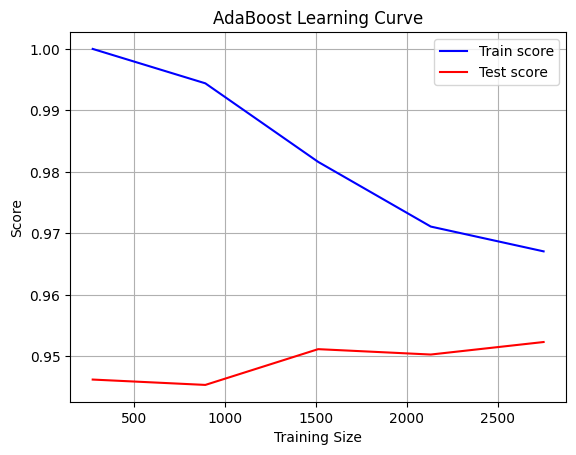

Gradient Boosting Accuracy: 0.9443


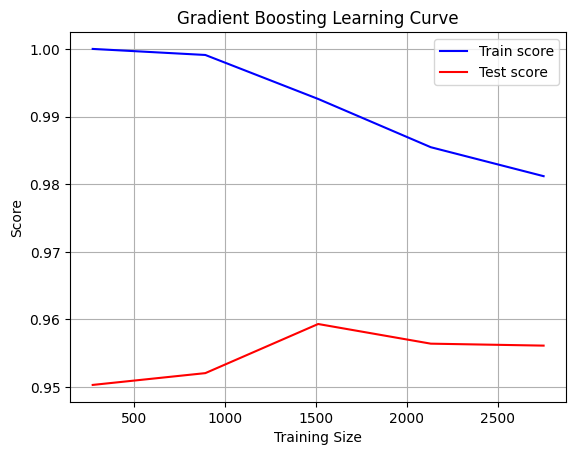

XGBoost Accuracy: 0.9396


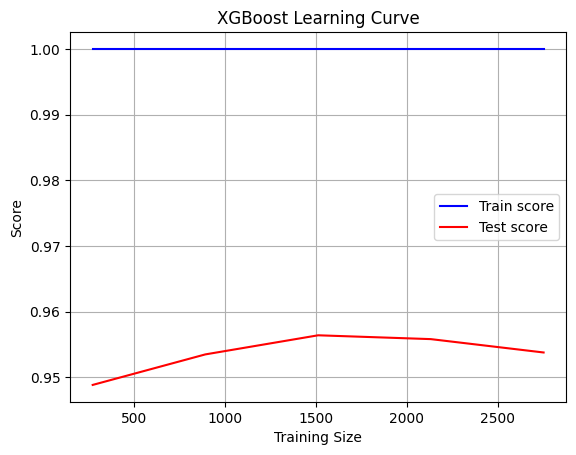

In [24]:
def plot_learning_curve(model, X_train, y_train, title="Learning Curve"):
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5)
    
    train_mean = train_scores.mean(axis=1)
    test_mean = test_scores.mean(axis=1)
    
    plt.plot(train_sizes, train_mean, label="Train score", color='blue')
    plt.plot(train_sizes, test_mean, label="Test score", color='red')
    plt.xlabel('Training Size')
    plt.ylabel('Score')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()


models = {
    "AdaBoost": ada_model,
    "Gradient Boosting": gb_model,
    "XGBoost": xgb_model
}

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    
    plot_learning_curve(model, X_train, y_train, title=f"{model_name} Learning Curve")

In [25]:
param_grid_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

grid_search_ada = GridSearchCV(AdaBoostClassifier(base_model), param_grid_ada, cv=5)
grid_search_ada.fit(X_train, y_train)

print(f"Best parameters for AdaBoost: {grid_search_ada.best_params_}")
print(f"AdaBoost best cross-validation score: {grid_search_ada.best_score_:.4f}")

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is 

Best parameters for AdaBoost: {'learning_rate': 0.1, 'n_estimators': 100}
AdaBoost best cross-validation score: 0.9553


In [26]:
param_grid_gb = {
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5]
}

grid_search_gb = GridSearchCV(GradientBoostingClassifier(), param_grid_gb, cv=5)
grid_search_gb.fit(X_train, y_train)

print(f"Best parameters for Gradient Boosting: {grid_search_gb.best_params_}")
print(f"Gradient Boosting best cross-validation score: {grid_search_gb.best_score_:.4f}")

Best parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Gradient Boosting best cross-validation score: 0.9602


In [27]:
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

grid_search_xgb = GridSearchCV(xgb.XGBClassifier(), param_grid_xgb, cv=5)
grid_search_xgb.fit(X_train, y_train)

print(f"Best parameters for XGBoost: {grid_search_xgb.best_params_}")
print(f"XGBoost best cross-validation score: {grid_search_xgb.best_score_:.4f}")

Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50, 'subsample': 1.0}
XGBoost best cross-validation score: 0.9605


In [28]:

xgb_reg_model = xgb.XGBClassifier(
    n_estimators=100, 
    learning_rate=0.1, 
    max_depth=3, 
    subsample=0.8, 
    alpha=0.1,  
    lambda_=1.0,  
    random_state=42
)

xgb_reg_model.fit(X_train, y_train)

y_pred_xgb_reg = xgb_reg_model.predict(X_test)
xgb_reg_accuracy = accuracy_score(y_test, y_pred_xgb_reg)
print(f"XGBoost with Regularization Accuracy: {xgb_reg_accuracy:.4f}")


XGBoost with Regularization Accuracy: 0.9454


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:41:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "lambda_" } are not used.

  warnings.warn(smsg, UserWarning)


In [29]:
models = {
    "AdaBoost": ada_model,
    "Gradient Boosting": gb_model,
    "XGBoost": xgb_model,
    "XGBoost with Regularization": xgb_reg_model
}

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.4f}")

AdaBoost Accuracy: 0.9431
Gradient Boosting Accuracy: 0.9443
XGBoost Accuracy: 0.9396
XGBoost with Regularization Accuracy: 0.9454


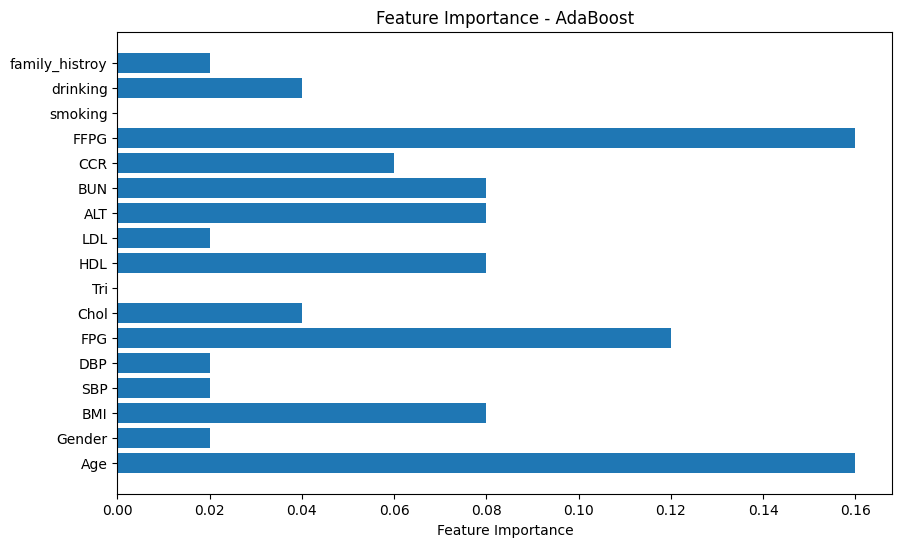

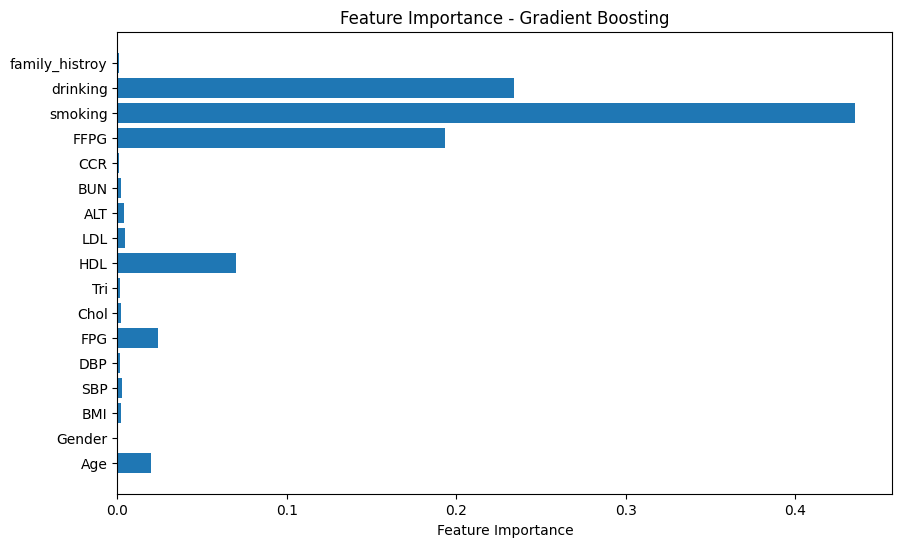

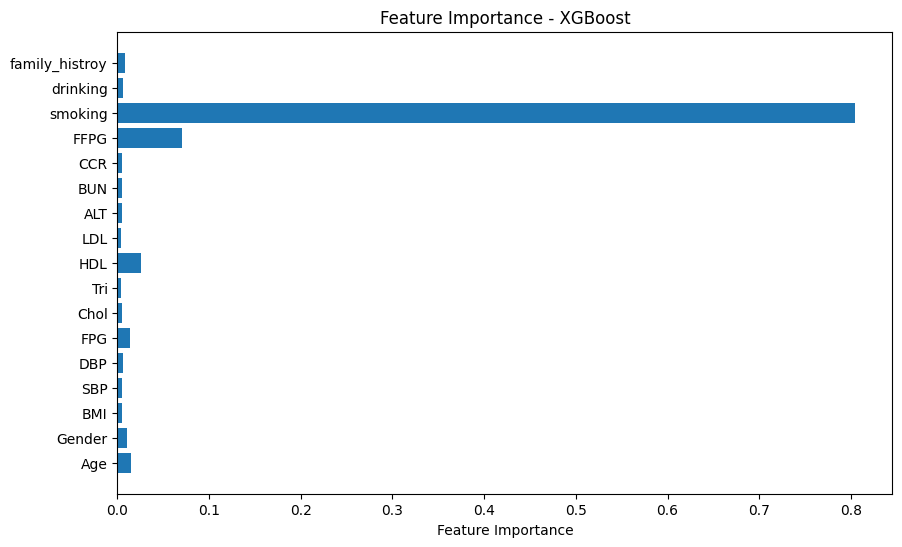

In [30]:
feature_importance_ada = ada_model.feature_importances_
feature_importance_gb = gb_model.feature_importances_
feature_importance_xgb = xgb_model.feature_importances_

def plot_feature_importance(importance, model_name):
    plt.figure(figsize=(10, 6))
    plt.barh(X.columns, importance)
    plt.xlabel('Feature Importance')
    plt.title(f'Feature Importance - {model_name}')
    plt.show()

plot_feature_importance(feature_importance_ada, 'AdaBoost')
plot_feature_importance(feature_importance_gb, 'Gradient Boosting')
plot_feature_importance(feature_importance_xgb, 'XGBoost')

In [32]:
import seaborn as sns

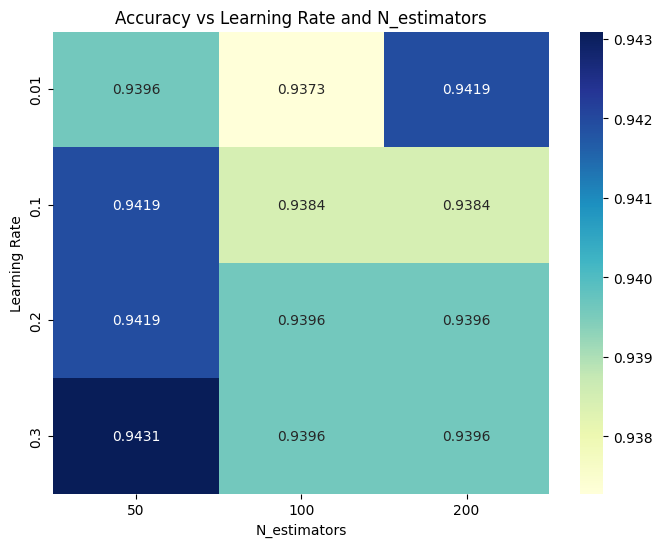

In [34]:
learning_rates = [0.01, 0.1, 0.2, 0.3]
n_estimators_list = [50, 100, 200]
results = []

for lr in learning_rates:
    for n in n_estimators_list:
        model = xgb.XGBClassifier(n_estimators=n, learning_rate=lr, random_state=42)
        model.fit(X_train, y_train)
        accuracy = accuracy_score(y_test, model.predict(X_test))
        results.append((lr, n, accuracy))

df_results = pd.DataFrame(results, columns=['Learning Rate', 'N_estimators', 'Accuracy'])

pivot_df = df_results.pivot(index='Learning Rate', columns='N_estimators', values='Accuracy')

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_df, annot=True, cmap="YlGnBu", fmt=".4f")
plt.title('Accuracy vs Learning Rate and N_estimators')
plt.show()